In [1]:
import tensorflow as tf

In [24]:
import numpy as np

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [16]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import tensorflow_datasets as tfds

In [5]:
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


In [8]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /Users/jacksonwalters/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [9]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

In [10]:
batch_size = 128

In [11]:
ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [12]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(batch_size)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu'),
  tf.keras.layers.Conv2D(64, kernel_size=(3, 3),
                 activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
#   tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

In [15]:
model.fit(
    ds_train,
    epochs=12,
    validation_data=ds_test,
)

Epoch 1/12
469/469 [==============================] - 14s 21ms/step - loss: 0.1613 - accuracy: 0.9516 - val_loss: 0.0509 - val_accuracy: 0.9827
Epoch 2/12
469/469 [==============================] - 9s 20ms/step - loss: 0.0436 - accuracy: 0.9869 - val_loss: 0.0417 - val_accuracy: 0.9871
Epoch 3/12
469/469 [==============================] - 9s 20ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0349 - val_accuracy: 0.9897
Epoch 4/12
469/469 [==============================] - 9s 20ms/step - loss: 0.0199 - accuracy: 0.9938 - val_loss: 0.0345 - val_accuracy: 0.9889
Epoch 5/12
469/469 [==============================] - 9s 20ms/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.0331 - val_accuracy: 0.9897
Epoch 6/12
469/469 [==============================] - 9s 20ms/step - loss: 0.0105 - accuracy: 0.9970 - val_loss: 0.0477 - val_accuracy: 0.9861
Epoch 7/12
469/469 [==============================] - 9s 20ms/step - loss: 0.0083 - accuracy: 0.9973 - val_loss: 0.0433 - val_accuracy: 0.988

In [117]:
#there are 469 batches of labeled training examples
train_list=list(ds_train)
len(list(train_list))

469

In [139]:
#there are 128 labeled examples per batch
#each image is 28x28
train_list[0]

(<tf.Tensor: shape=(128, 28, 28, 1), dtype=float32, numpy=
 array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [

In [171]:
#the labels are digits 0-9
train_list[0][1]

<tf.Tensor: shape=(128,), dtype=int64, numpy=
array([7, 0, 7, 5, 1, 9, 1, 6, 1, 1, 4, 5, 8, 4, 6, 0, 1, 0, 6, 4, 2, 5,
       8, 9, 5, 8, 4, 6, 8, 4, 7, 9, 9, 5, 2, 4, 9, 6, 7, 1, 5, 0, 2, 5,
       1, 8, 3, 1, 4, 0, 1, 8, 1, 1, 4, 8, 8, 5, 8, 9, 6, 6, 4, 0, 7, 0,
       7, 1, 4, 1, 7, 1, 8, 9, 3, 6, 1, 5, 4, 3, 0, 9, 5, 9, 5, 2, 9, 5,
       7, 1, 6, 3, 1, 7, 8, 2, 6, 4, 4, 2, 4, 8, 8, 7, 0, 6, 9, 2, 8, 4,
       4, 1, 1, 7, 1, 5, 3, 3, 2, 4, 6, 3, 6, 2, 8, 1, 1, 1])>

In [170]:
#image array corresponding to the first example from the first batch
test_img=np.array(train_list[0][0])[0]; test_img

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

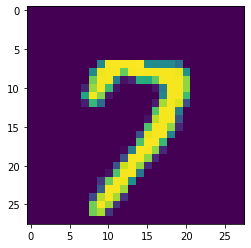

In [172]:
#we can plot the image
import matplotlib.pyplot as plt
test_img=np.reshape(test_img,(28,28))
plt.imshow(test_img)

In [173]:
#the label for the first example
np.array(train_list[0][1])[0]

7

In [174]:
#the prediction output values for each digit for the first example
pred=model.predict(train_list[0][0])[0]; pred

array([1.1282347e-11, 1.2595991e-13, 6.8693662e-13, 1.1221787e-12,
       7.4202087e-19, 1.3308559e-14, 1.5832142e-21, 1.0000000e+00,
       7.0172343e-14, 1.9662560e-11], dtype=float32)

In [175]:
np.argmax(pred)

7